In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

In [16]:
G = nx.Graph()

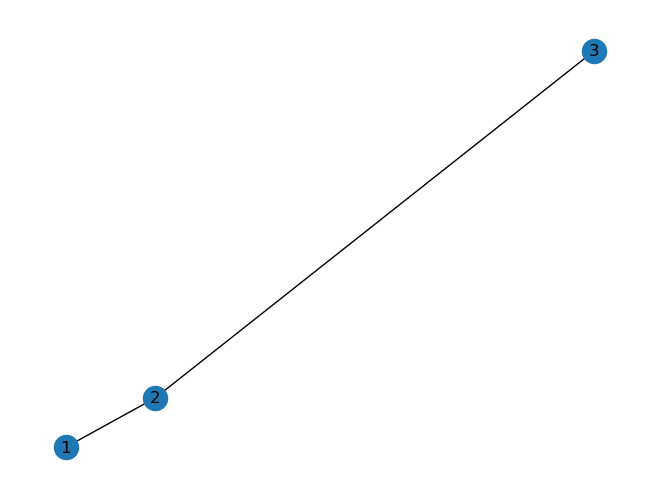

In [22]:
G.add_edge(1, 2, color = "blue")
G.add_edge(2, 3, weight = 0.01, color = "white")

nx.draw_spring(G, with_labels = True)

In [26]:
df = pd.read_csv("../data/NBT20FRI-new.csv")
df.head(10)

Line Dir          From Station          To Station
0  Bakerloo  NB  Elephant & Castle LU       Lambeth North
1  Bakerloo  NB         Lambeth North         Waterloo LU
2  Bakerloo  NB           Waterloo LU          Embankment
3  Bakerloo  NB            Embankment    Charing Cross LU
4  Bakerloo  NB      Charing Cross LU   Piccadilly Circus
5  Bakerloo  NB     Piccadilly Circus       Oxford Circus
6  Bakerloo  NB         Oxford Circus       Regent's Park
7  Bakerloo  NB         Regent's Park        Baker Street
8  Bakerloo  NB          Baker Street       Marylebone LU
9  Bakerloo  NB         Marylebone LU  Edgware Road (Bak)

In [28]:
df["Line"].unique()

array(['Bakerloo', 'Central', 'District', 'DLR', 'Elizabeth Line',
       'H&C and Circle', 'Jubilee', 'LO East London',
       'LO Gospel Oak-Barking', 'LO North London', 'LO Romford–Upminster',
       'LO Watford-Euston', 'LO West Anglia', 'London Trams',
       'Metropolitan', 'Northern', 'Piccadilly', 'Victoria',
       'Waterloo & City'], dtype=object)

London Underground :
'Bakerloo', 'Central', 'District', 'DLR', 'Elizabeth Line', 'H&C and Circle', 'Jubilee', 'Metropolitan', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo & City'

London Overground:
'LO East London', 'LO Gospel Oak-Barking', 'LO North London', 'LO Romford–Upminster', 'LO Watford-Euston', 'LO West Anglia'

London Trams
'London Trams',

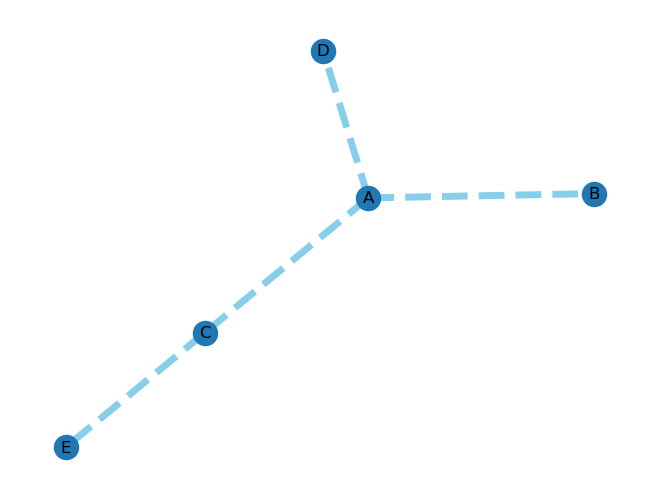

In [32]:
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Chart with Custom edges:
nx.draw(G, with_labels=True, width=5, edge_color="skyblue", style = "dashed")

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph


In [49]:
# Create a modular graph (dummy data)
partition_sizes = [1,2,3,4]
g = nx.random_partition_graph(partition_sizes, 0.9, 0.1)

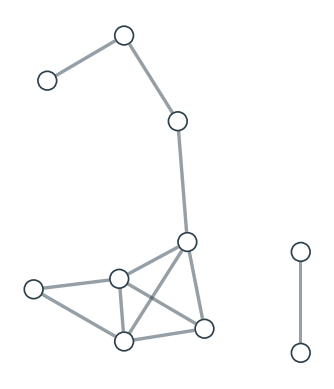

In [50]:
Graph(g)


In [41]:
node_to_community = dict()
node = 0
for community_id, size in enumerate(partition_sizes):
    for _ in range(size):
        node_to_community[node] = community_id
        node += 1

# Color nodes according to their community.
community_to_color = {
    0 : 'tab:blue',
    1 : 'tab:orange',
    2 : 'tab:green',
    3 : 'tab:red',
}
node_color = {node: community_to_color[community_id] \
              for node, community_id in node_to_community.items()}

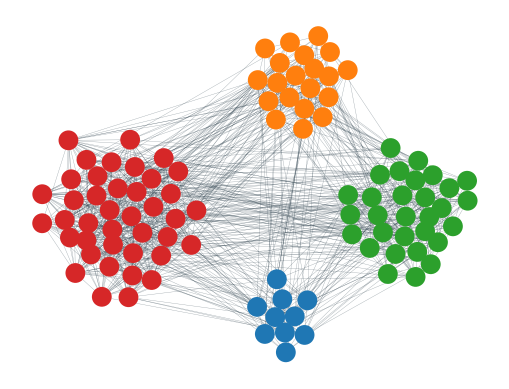

In [42]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, # indicates the community each belongs to  
      node_edge_width=0,     # no black border around nodes 
      edge_width=0.1,        # use thin edges, as they carry no information in this visualisation
      edge_alpha=0.5,        # low edge alpha values accentuates bundles as they appear darker than single edges
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      ax=ax,
)
plt.show()

/Users/biryani/anaconda3/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


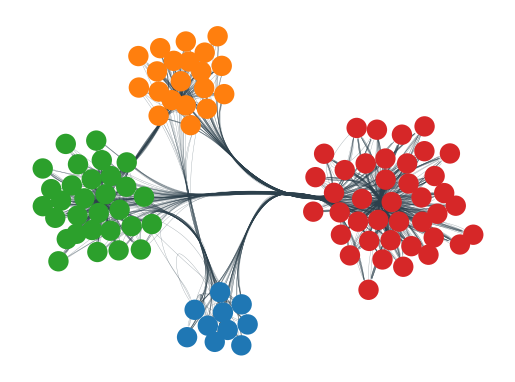

In [43]:
fig, ax = plt.subplots()
Graph(g,
      node_color=node_color, 
      node_edge_width=0,     
      edge_width=0.1,        
      edge_alpha=0.5,        
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', # this is where bundling is made possible
      ax=ax,
)
plt.show()

NotImplementedError: Node layout force not implemented. Available layouts are:
	spring
	community
	circular
	linear
	bipartite
	multipartite
	shell
	dot
	radial
	random
	geometric

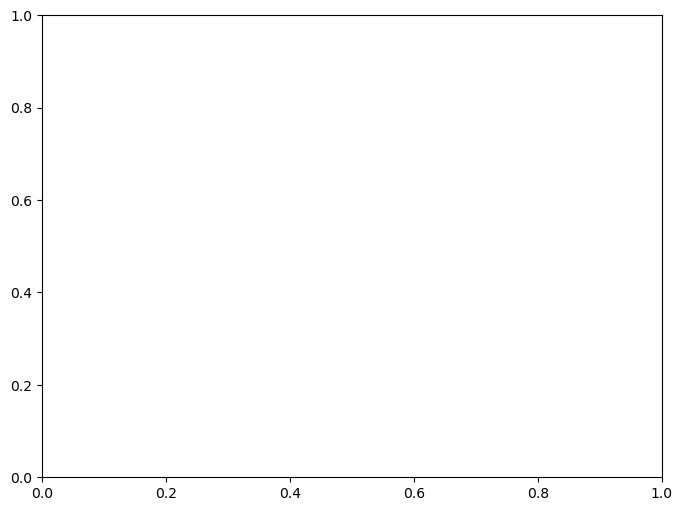

In [44]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Plot the graph using netgraph
fig, ax = plt.subplots(figsize=(8, 6))
Graph(G,
      ax=ax,
      node_size=200,
      node_edge_width=0.5,
      node_color='lightblue',
      edge_width=1.5,
      edge_color='gray',
      edge_alpha=0.7,
      node_layout='force',  # Force-directed layout
      edge_layout='force',  # Force-directed layout
      labels=None  # No node labels for cleaner visualization
      )

plt.title('Simple Network Visualization using netgraph')
plt.show()

In [52]:
nodes_df = pd.read_csv('../References/London_Multiplex_Transport/Dataset/london_transport_nodes.txt', sep = ' ', engine='python')
nodes_df.head(10)

nodeID          nodeLabel    nodeLat  nodeLong
0       0          abbeyroad  51.531952  0.003738
1       1            westham  51.528526  0.005332
2       2       actoncentral  51.508758 -0.263416
3       3  willesdenjunction  51.532234 -0.243895
4       4          actontown  51.503071 -0.280288
5       5       chiswickpark  51.494371 -0.267723
6       6       turnhamgreen  51.495182 -0.254510
7       7            aldgate  51.514342 -0.075613
8       8    liverpoolstreet  51.517598 -0.082235
9       9        aldgateeast  51.515082 -0.072987

In [62]:
df_summary = pd.read_csv('../References/London_Multiplex_Transport/Dataset/london_transport_disruptions_summary.txt', sep = ' ', engine='python')
df_summary.head(10)

#DISRUP_ID             LAYER        STATION_A          STATION_B  \
0      DISR1      metropolitan          aldgate        bakerstreet   
1      DISR2  hammersmith&city          barking           moorgate   
2      DISR3               dlr          beckton        canningtown   
3      DISR4        overground  claphamjunction        surreyquays   
4      DISR5        overground         richmond  willesdenjunction   
5      DISR6          northern          edgware          hampstead   
6      DISR7        piccadilly        actontown           uxbridge   
7      DISR8        overground  claphamjunction  willesdenjunction   
8      DISR9        piccadilly      raynerslane           uxbridge   
9     DISR10        overground         newcross        westcroydon   

   FREQUENCY%  DAMAGED_NODES%  
0      3.3457           2.439  
1      2.8914           3.523  
2      2.5609           2.439  
3      2.0240           1.897  
4      1.9413           1.626  
5      1.8174           1.897  
6      1.5696           4.065  
7      1.5696           1.626  
8      1.5283           1.897  
9      1.4457           2.981

In [63]:
layers = pd.read_csv('../References/London_Multiplex_Transport/Dataset/london_transport_layers.txt', sep = ' ', engine='python')
layers.head(10)

layerID   layerLabel
1 Tube       (All underground   lines  aggregated)
2 Overground NaN  NaN            None         None
3 DLR        NaN  NaN            None         None

In [64]:
edges_file = '../References/London_Multiplex_Transport/Dataset/london_transport_raw.edges'
edges_df = pd.read_csv(edges_file, sep=' ', names=['Line', 'From Station', 'To Station'])

     nodeID          nodeLabel          x          y
0         0          abbeyroad  32.082647   9.387191
1         1            westham  32.165782   9.177511
2         2       actoncentral  18.149537   7.967840
3         3  willesdenjunction  19.167638   9.404448
4         4          actontown  17.269570   7.619869
..      ...                ...        ...        ...
364     364    watfordjunction  11.226535  17.460619
365     365       westfinchley  22.035690  14.118168
366     366        westruislip   9.052331  11.690295
367     367          wimbledon  21.110177   2.604165
368     368      wimbledonpark  21.500110   3.428642

[369 rows x 4 columns]


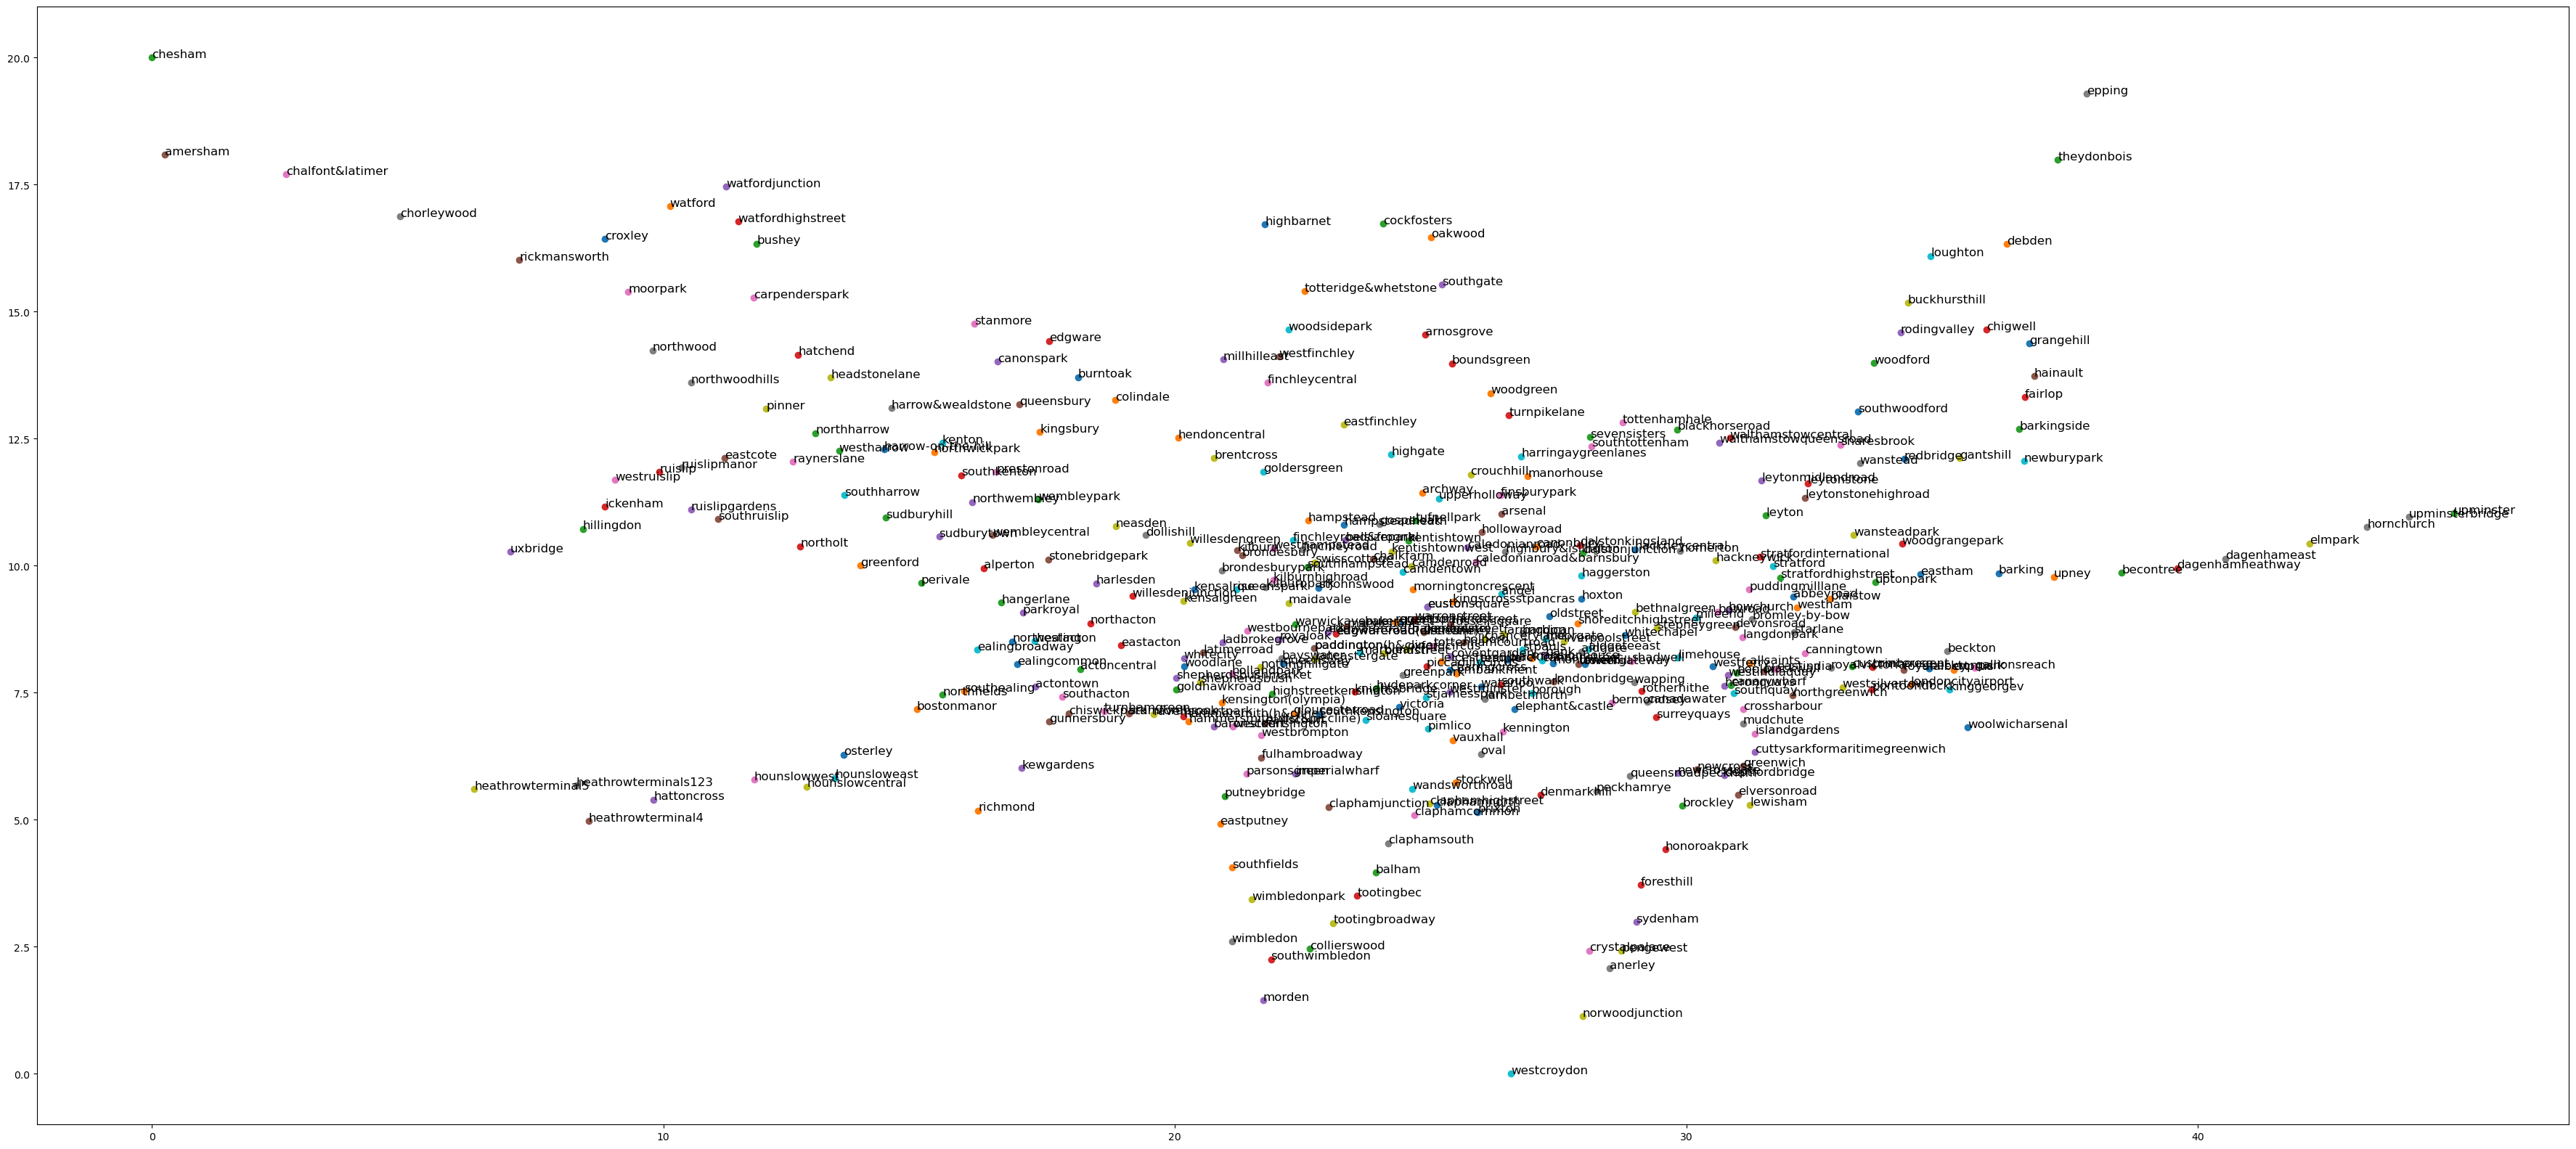

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def convert_to_cartesian(nodes_df, figsize=(45, 20)):
    """
    Convert latitude and longitude to Cartesian coordinates for plotting.
    
    Parameters:
    - nodes_df (pd.DataFrame): DataFrame with columns ['nodeID', 'nodeLabel', 'nodeLat', 'nodeLong'].
    - figsize (tuple): Size of the figure for plotting.
    
    Returns:
    - pd.DataFrame: DataFrame with columns ['nodeID', 'nodeLabel', 'x', 'y'] for Cartesian coordinates.
    """
    # Extract latitudes and longitudes
    latitudes = nodes_df['nodeLat'].values
    longitudes = nodes_df['nodeLong'].values
    
    # Normalize latitudes and longitudes to range [0, 1]
    scaler = MinMaxScaler()
    normalized_coords = scaler.fit_transform(np.column_stack((latitudes, longitudes)))
    
    # Scale to the size of the figure
    fig_width, fig_height = figsize
    scaled_lats = normalized_coords[:, 0] * fig_height
    scaled_longs = normalized_coords[:, 1] * fig_width
    
    # Create a DataFrame with Cartesian coordinates
    cartesian_df = pd.DataFrame({
        'nodeID': nodes_df['nodeID'],
        'nodeLabel': nodes_df['nodeLabel'],
        'x': scaled_longs,
        'y': scaled_lats
    })
    
    return cartesian_df

# # Example usage
# data = {
#     'nodeID': [1, 2, 3, 4, 5, 6, 7, 8],
#     'nodeLabel': ["Node1", "Node2", "Node3", "Node4", "Stratford", "KingsCrossStPancras", "BakerStreet", "OxfordStreet"],
#     'nodeLat': [51.5074, 51.5155, 51.5276, 51.5321, 51.5422, 51.5308, 51.5237, 51.5152],
#     'nodeLong': [-0.1278, -0.1411, -0.1023, -0.1245, -0.0035, -0.1238, -0.1586, -0.1428]
# }

# nodes_df = pd.DataFrame(data)
cartesian_df = convert_to_cartesian(nodes_df)

print(cartesian_df)

# Plotting
plt.figure(figsize=(45, 20))
for _, row in cartesian_df.iterrows():
    plt.scatter(row['x'], row['y'], label=row['nodeLabel'])
    plt.text(row['x'], row['y'], row['nodeLabel'], fontsize=12)
plt.show()


     nodeID          nodeLabel          x          y
0         0          abbeyroad  45.454975  13.022135
1         1            westham  45.940509  10.483691
2         2       actoncentral   6.626894   3.285464
3         3  willesdenjunction   9.156981  11.330164
4         4          actontown   4.164574   0.338298
..      ...                ...        ...        ...
364     364    watfordjunction   2.255589  30.545701
365     365       westfinchley  18.542841  29.373126
366     366        westruislip  -7.510348  14.211634
367     367          wimbledon  13.539657 -13.981186
368     368      wimbledonpark  15.995469 -12.226009

[369 rows x 4 columns]


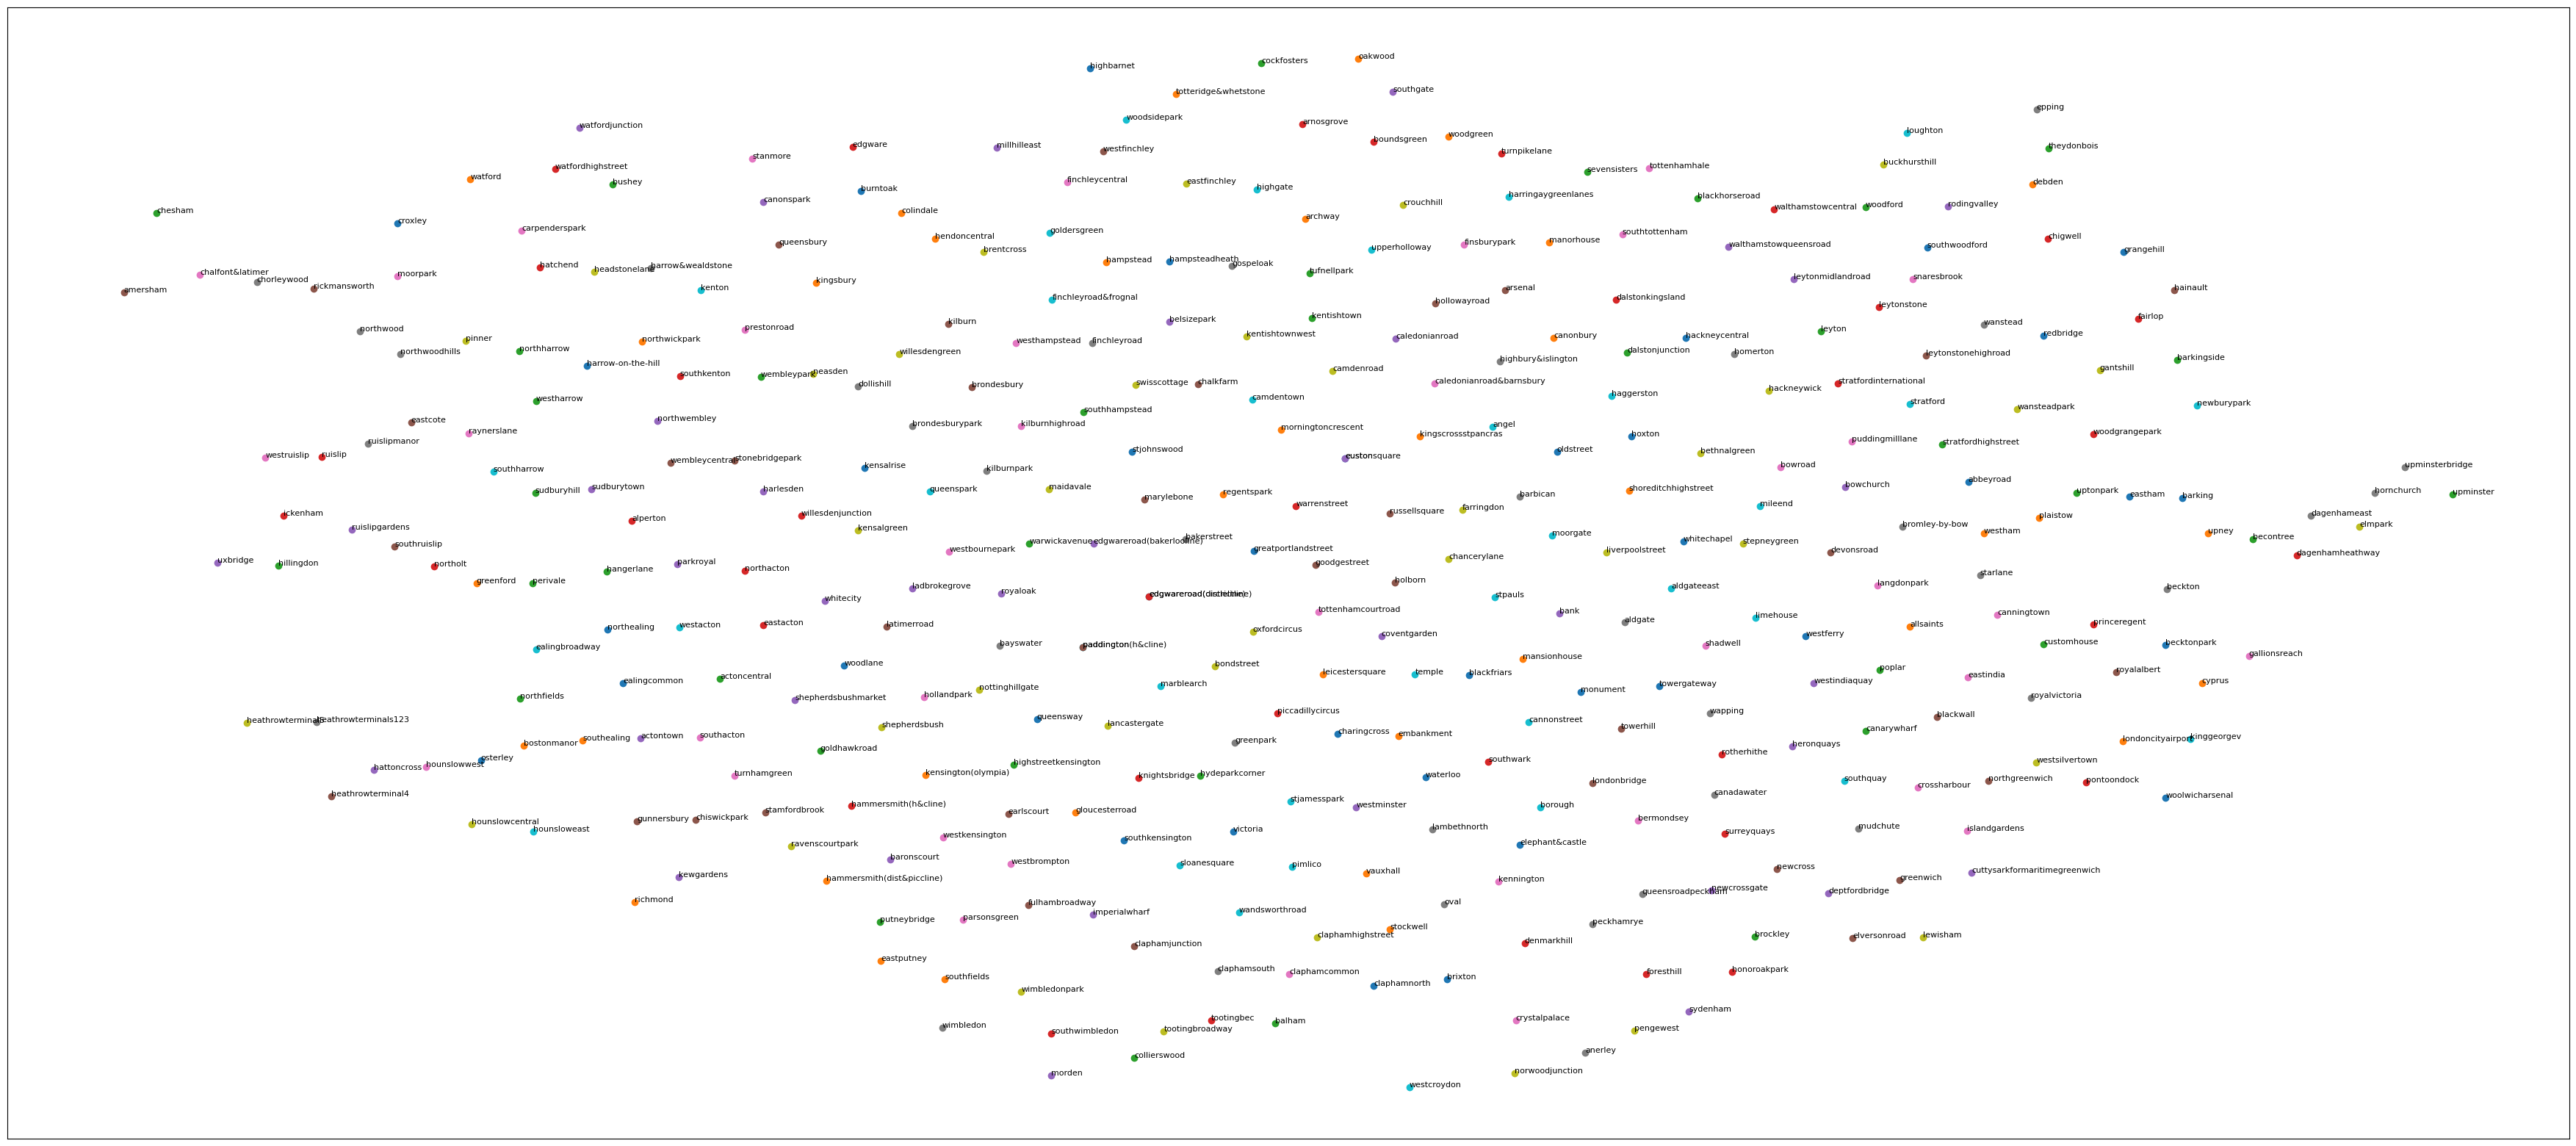

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform

def apply_repulsion(cartesian_df, iterations=100, repulsion_strength=0.01):
    """
    Apply a simple repulsion force to spread out nodes to avoid overlapping.
    
    Parameters:
    - cartesian_df (pd.DataFrame): DataFrame with Cartesian coordinates.
    - iterations (int): Number of iterations for the force-directed algorithm.
    - repulsion_strength (float): Strength of the repulsion force.
    
    Returns:
    - pd.DataFrame: Updated DataFrame with adjusted Cartesian coordinates.
    """
    coords = cartesian_df[['x', 'y']].values
    for _ in range(iterations):
        distances = squareform(pdist(coords))
        # Avoid division by zero and ensure valid distances
        np.fill_diagonal(distances, np.inf)
        with np.errstate(divide='ignore', invalid='ignore'):
            repulsion = np.nan_to_num(repulsion_strength / distances**2, nan=0.0, posinf=0.0, neginf=0.0)
        force_x = np.sum(repulsion * (coords[:, 0][:, np.newaxis] - coords[:, 0]), axis=1)
        force_y = np.sum(repulsion * (coords[:, 1][:, np.newaxis] - coords[:, 1]), axis=1)
        coords[:, 0] += force_x
        coords[:, 1] += force_y
    
    cartesian_df['x'] = coords[:, 0]
    cartesian_df['y'] = coords[:, 1]
    return cartesian_df

def convert_to_cartesian(nodes_df, figsize=(45, 20), iterations=100, repulsion_strength=0.01):
    """
    Convert latitude and longitude to Cartesian coordinates for plotting.
    
    Parameters:
    - nodes_df (pd.DataFrame): DataFrame with columns ['nodeID', 'nodeLabel', 'nodeLat', 'nodeLong'].
    - figsize (tuple): Size of the figure for plotting.
    - iterations (int): Number of iterations for the force-directed algorithm.
    - repulsion_strength (float): Strength of the repulsion force.
    
    Returns:
    - pd.DataFrame: DataFrame with columns ['nodeID', 'nodeLabel', 'x', 'y'] for Cartesian coordinates.
    """
    # Ensure there are no NaN values in latitude and longitude
    # nodes_df = nodes_df.dropna(subset=['nodeLat', 'nodeLong'])
    
    # Extract latitudes and longitudes
    latitudes = nodes_df['nodeLat'].values
    longitudes = nodes_df['nodeLong'].values
    
    # Normalize latitudes and longitudes to range [0, 1]
    scaler = MinMaxScaler()
    normalized_coords = scaler.fit_transform(np.column_stack((latitudes, longitudes)))
    
    # Scale to the size of the figure
    fig_width, fig_height = figsize
    scaled_lats = normalized_coords[:, 0] * fig_height
    scaled_longs = normalized_coords[:, 1] * fig_width
    
    # Create a DataFrame with Cartesian coordinates
    cartesian_df = pd.DataFrame({
        'nodeID': nodes_df['nodeID'],
        'nodeLabel': nodes_df['nodeLabel'],
        'x': scaled_longs,
        'y': scaled_lats
    })
    
    # Apply repulsion to spread out nodes
    cartesian_df = apply_repulsion(cartesian_df, iterations, repulsion_strength)
    
    return cartesian_df


cartesian_df = convert_to_cartesian(nodes_df)

print(cartesian_df)

# Plotting
plt.figure(figsize=(45, 20))
for _, row in cartesian_df.iterrows():
    plt.scatter(row['x'], row['y'], label=row['nodeLabel'])
    plt.text(row['x'], row['y'], row['nodeLabel'], fontsize=8)
plt.xticks([])  # Remove x-axis labels
plt.yticks([]) 
plt.show()


# Attempting integration of the graphs

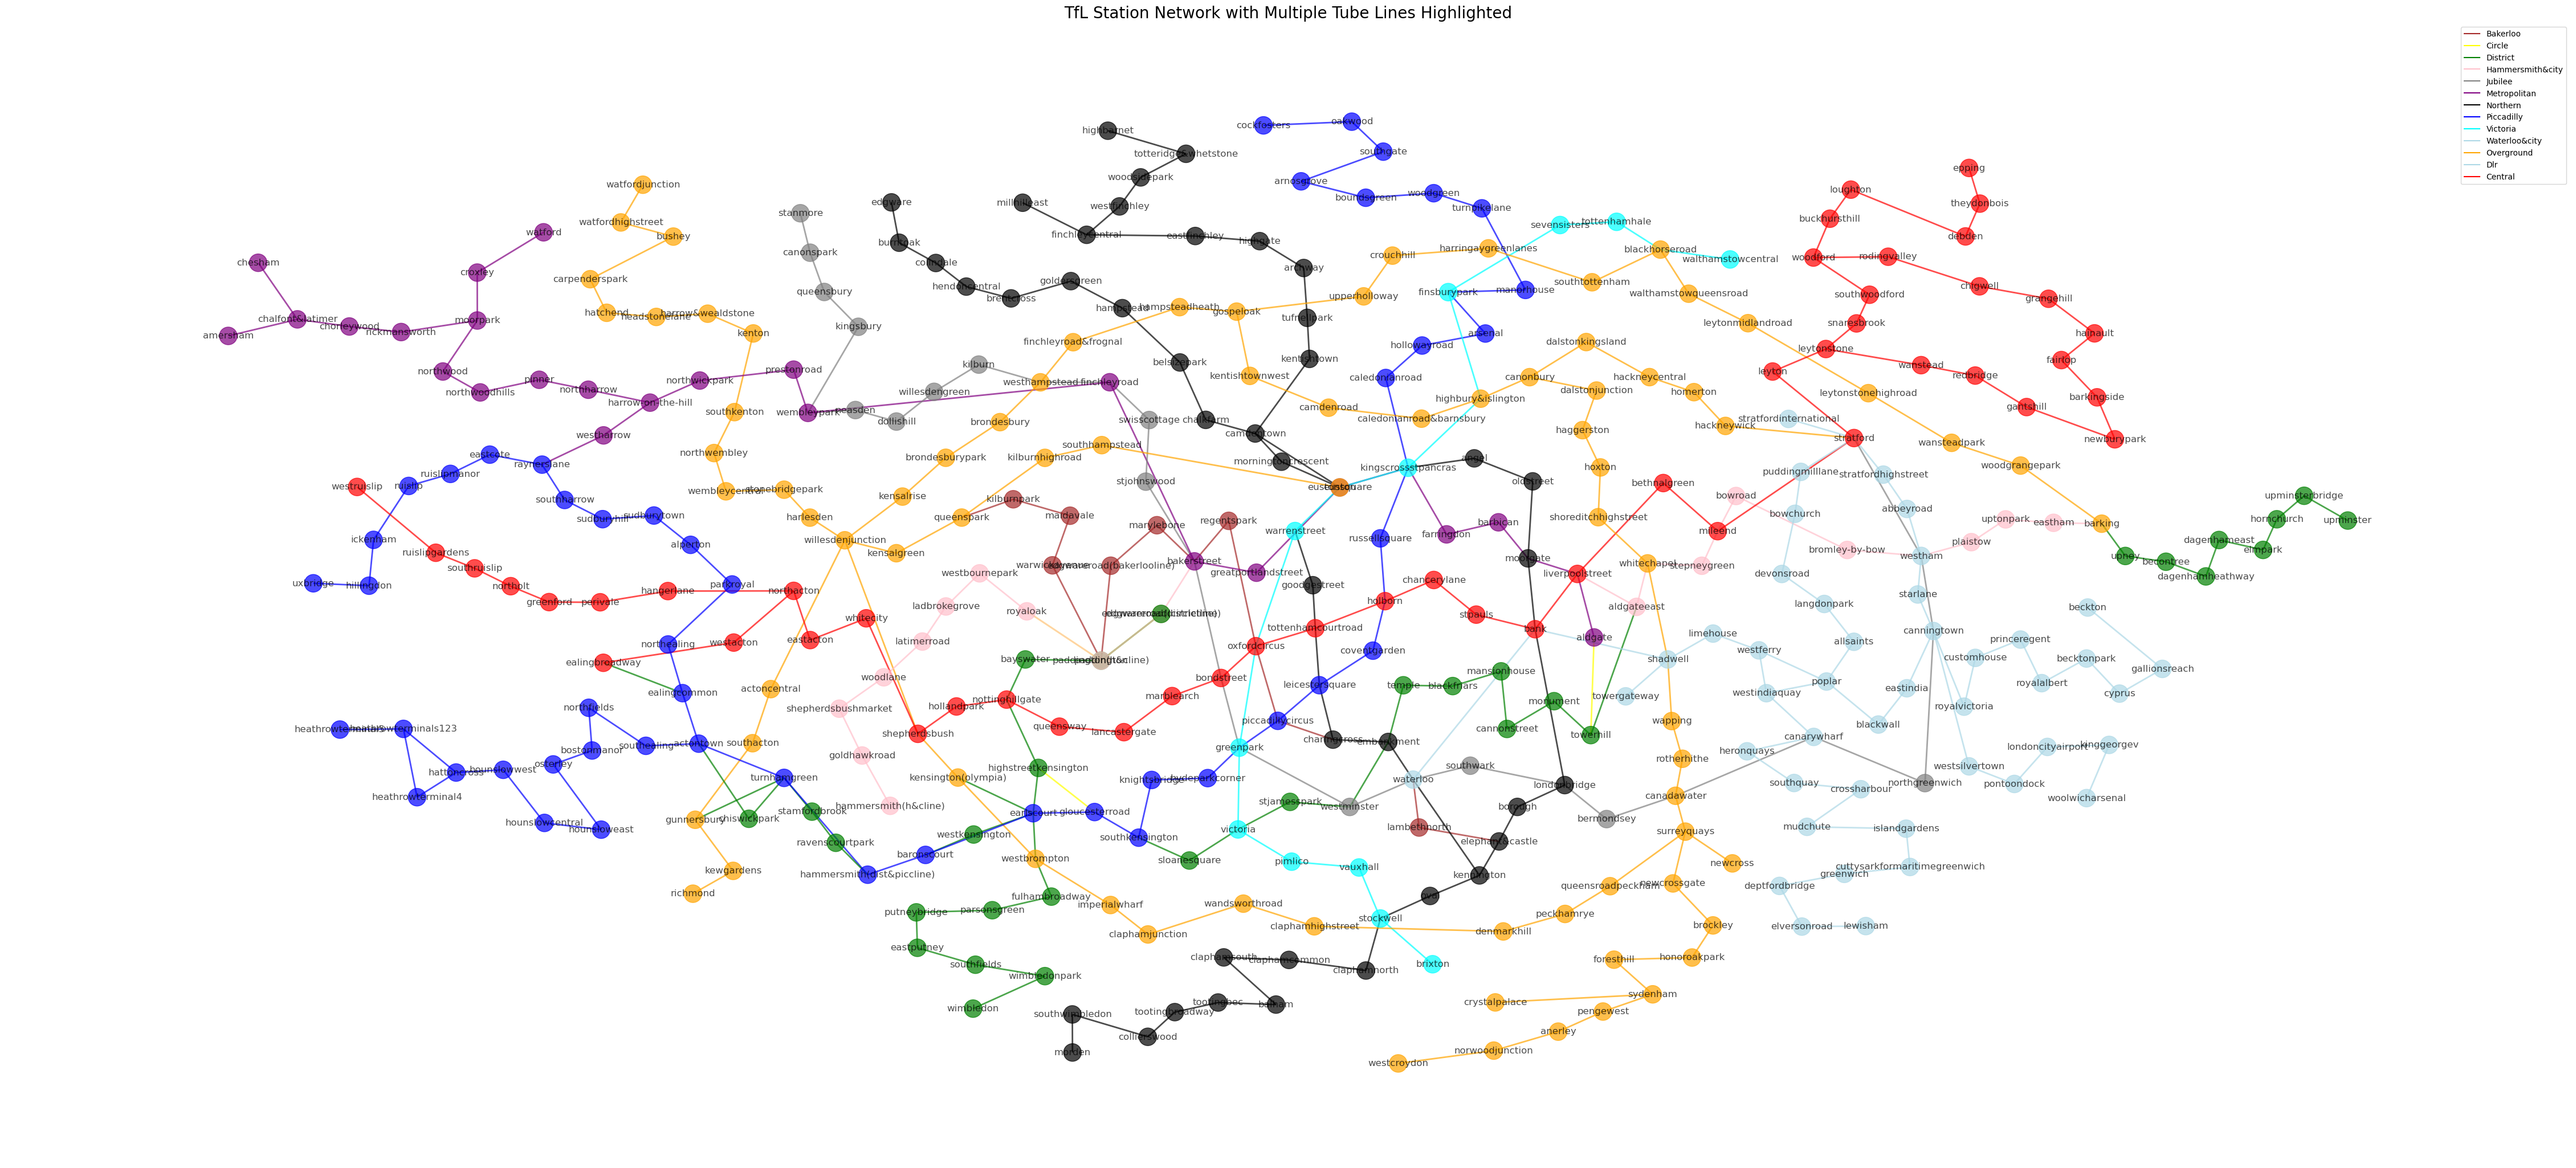

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
import networkx as nx

def apply_repulsion(cartesian_df, iterations=100, repulsion_strength=0.01):
    """
    Apply a simple repulsion force to spread out nodes to avoid overlapping.
    
    Parameters:
    - cartesian_df (pd.DataFrame): DataFrame with Cartesian coordinates.
    - iterations (int): Number of iterations for the force-directed algorithm.
    - repulsion_strength (float): Strength of the repulsion force.
    
    Returns:
    - pd.DataFrame: Updated DataFrame with adjusted Cartesian coordinates.
    """
    coords = cartesian_df[['x', 'y']].values
    for _ in range(iterations):
        distances = squareform(pdist(coords))
        # Avoid division by zero and ensure valid distances
        np.fill_diagonal(distances, np.inf)
        with np.errstate(divide='ignore', invalid='ignore'):
            repulsion = np.nan_to_num(repulsion_strength / distances**2, nan=0.0, posinf=0.0, neginf=0.0)
        force_x = np.sum(repulsion * (coords[:, 0][:, np.newaxis] - coords[:, 0]), axis=1)
        force_y = np.sum(repulsion * (coords[:, 1][:, np.newaxis] - coords[:, 1]), axis=1)
        coords[:, 0] += force_x
        coords[:, 1] += force_y
    
    cartesian_df['x'] = coords[:, 0]
    cartesian_df['y'] = coords[:, 1]
    return cartesian_df

def convert_to_cartesian(nodes_df, figsize=(45, 20), iterations=100, repulsion_strength=0.01):
    """
    Convert latitude and longitude to Cartesian coordinates for plotting.
    
    Parameters:
    - nodes_df (pd.DataFrame): DataFrame with columns ['nodeID', 'nodeLabel', 'nodeLat', 'nodeLong'].
    - figsize (tuple): Size of the figure for plotting.
    - iterations (int): Number of iterations for the force-directed algorithm.
    - repulsion_strength (float): Strength of the repulsion force.
    
    Returns:
    - pd.DataFrame: DataFrame with columns ['nodeID', 'nodeLabel', 'x', 'y'] for Cartesian coordinates.
    """
    # Ensure there are no NaN values in latitude and longitude
    nodes_df = nodes_df.dropna(subset=['nodeLat', 'nodeLong'])
    
    # Extract latitudes and longitudes
    latitudes = nodes_df['nodeLat'].values
    longitudes = nodes_df['nodeLong'].values
    
    # Normalize latitudes and longitudes to range [0, 1]
    scaler = MinMaxScaler()
    normalized_coords = scaler.fit_transform(np.column_stack((latitudes, longitudes)))
    
    # Scale to the size of the figure
    fig_width, fig_height = figsize
    scaled_lats = normalized_coords[:, 0] * fig_height
    scaled_longs = normalized_coords[:, 1] * fig_width
    
    # Create a DataFrame with Cartesian coordinates
    cartesian_df = pd.DataFrame({
        'nodeID': nodes_df['nodeID'],
        'nodeLabel': nodes_df['nodeLabel'],
        'x': scaled_longs,
        'y': scaled_lats
    })
    
    # Apply repulsion to spread out nodes
    cartesian_df = apply_repulsion(cartesian_df, iterations, repulsion_strength)
    
    return cartesian_df



# Function to assign colors to lines
def assign_line_colors(edges_df):
    line_colors = {
        'bakerloo': 'brown',
        'circle': 'yellow',
        'district': 'green',
        'hammersmith&city': 'pink',
        'jubilee': 'gray',
        'metropolitan': 'purple',
        'northern': 'black',
        'piccadilly': 'blue',
        'victoria': 'cyan',
        'waterloo&city': 'lightblue',
        'overground': 'orange',
        'dlr': 'lightblue',
        'central': 'red'  # Adding Central line for completeness
    }
    
    line_stations = {}
    for line in line_colors:
        line_stations[line] = set(edges_df[edges_df['Line'] == line]['From Station']).union(set(edges_df[edges_df['Line'] == line]['To Station']))
    
    return line_colors, line_stations


# Create the graph and plot
def plot_tube_network(nodes_df, edges_df):
    # Convert nodes to Cartesian coordinates
    cartesian_df = convert_to_cartesian(nodes_df)
    
    # Assign colors to lines
    line_colors, line_stations = assign_line_colors(edges_df)
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes with positions
    pos = {}
    for _, row in cartesian_df.iterrows():
        pos[row['nodeLabel']] = (row['x'], row['y'])
    
    # Add nodes with colors
    node_color_map = {}
    for line, stations in line_stations.items():
        for station in stations:
            G.add_node(station)
            if station in pos:
                node_color_map[station] = line_colors[line]
            else:
                node_color_map[station] = 'gray'  # Station not in nodes_df
    
    # Add edges with colors
    for _, row in edges_df.iterrows():
        line = row['Line']
        if row['From Station'] in line_stations[line] and row['To Station'] in line_stations[line]:
            G.add_edge(row['From Station'], row['To Station'], color=line_colors[line])
        else:
            G.add_edge(row['From Station'], row['To Station'], color='gray')  # Edge not valid
    
    # Draw the graph
    plt.figure(figsize=(45, 20))
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=12, node_color=list(node_color_map.values()), font_color='black', edge_color=[G[u][v]['color'] for u, v in G.edges()], width=2, alpha=0.7)
    
    # Create custom legend for line colors
    legend_patches = []
    for line, color in line_colors.items():
        legend_patches.append(plt.Line2D([], [], color=color, label=line.capitalize(), linestyle='-'))
    
    plt.legend(handles=legend_patches)
    
    plt.title('TfL Station Network with Multiple Tube Lines Highlighted', fontsize=20)
    plt.show()

# Example usage
plot_tube_network(nodes_df, edges_df)
